<a href="https://colab.research.google.com/github/JABU-2022/heart-disease-analysis/blob/main/heart_disease_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABOUT AUTHOR

Hi! I am Jaques BUTERA, a data science student at World Quant University (WQU) and a Software student majoring in AI/ML at African Leadership University (ALU). As a data enthusiast, I always love to play with data and explore its insights. I have expertise in data wrangling, data visualization, data analysis, and building machine learning algorithms and their evaluation.

Let's dive with me into this notebook to explore it. If you like my notebook, then don't forget to upvote it.


# **Heart Disease Dataset Analysis**

## **Identifying High-Risk Patients for Heart Disease: Clustering Analysis and Risk Factor Identification**

## **Notebook Content**

## 1. Introduction
- **Overview of the heart disease dataset**
- **Objectives and goals of the analysis**

## 2. Loading the Dataset
- **Import necessary libraries**
- **Load the dataset**
- **Display the first few rows of the dataframe**

## 3. Exploratory Data Analysis (EDA)
- **Summary statistics**
- **Check for missing values**
- **Data types of each column**
- **Distribution of target variable**
- **Visualizations (Frequency distribution, boxplots, correlation matrix)**

## 4. Data Preprocessing
- **Handle missing values**
- **Scale numerical features**
- **Encode categorical variables (e.g., OrdinalEncoder)**
- **Split the data into features and target variable**

## 5. Clustering
- **K-means clustering**
  - Apply K-means
  - Determine optimal number of clusters (Elbow method, silhouette score)
- **Hierarchical clustering**
  - Apply hierarchical clustering
  - Visualize dendrogram
- **DBSCAN clustering**
  - Apply DBSCAN
  - Tune parameters (epsilon, minimum samples)

## 6. Dimensionality Reduction for Visualization
- **Principal Component Analysis (PCA)**
  - Apply PCA
  - Visualize clusters in 2D/3D space
- **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
  - Apply t-SNE
  - Visualize clusters in 2D space

## 7. Gaussian Mixture Models (GMMs)
- **Apply GMM to identify clusters**
- **Analyze risk factors associated with heart disease**
- **Compare GMM clusters with other clustering methods**

## 8. Evaluation of Clustering Performance
- **Silhouette score**
- **Davies-Bouldin index**
- **Compare performance of K-means, hierarchical clustering, DBSCAN, and GMMs**

## 9. Conclusion
- **Summary of findings**
- **Recommendations based on clustering results**
- **Potential improvements and future work**

# **#Here is the workflow starting with the introduction**

**1. INTRODUCTION**

## Dataset Information

### Overview
This dataset originally contains 76 attributes, although most studies utilize a subset of 14 attributes. The data primarily focuses on the Cleveland database, which is widely used in machine learning research related to heart disease. The "goal" field indicates the presence of heart disease in patients, represented as an integer value ranging from 0 (no presence) to 4. Previous experiments have mainly aimed at distinguishing between the presence (values 1, 2, 3, 4) and absence (value 0) of heart disease.

### Additional Information
- The dataset has undergone anonymization where patient names and social security numbers were replaced with dummy values to ensure privacy.
- The dataset contains missing values that need to be addressed during preprocessing.



**2. Loading the Dataset**

**2.1 import the necessary libraries**

In [40]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install sweetviz if not already installed
!pip install sweetviz

import sweetviz as sv
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Import necessary libraries for clustering and visualization
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [41]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2.2 Load the dataset**

In [42]:
from google.colab import files

uploaded = files.upload()


Saving heart_disease_uci.csv to heart_disease_uci (1).csv


### **2.3 Display the first few rows of the dataframe**

In [43]:
df_old = pd.read_csv('heart_disease_uci.csv')
df_old=df_old.rename(columns={'num':'target', 'dataset':'origin','fbs':'fast_blood_sugar','cp':'chest_pain_type'})
df_old.head(5)

df = df_old
df.head()

,id,age,sex,origin,chest_pain_type,trestbps,chol,fast_blood_sugar,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## **3. Exploratory Data Analysis (EDA)**

**3.1 QUICK EDA BY SWEETVIZt**

                                             |          | [  0%]   00:00 -> (? left)


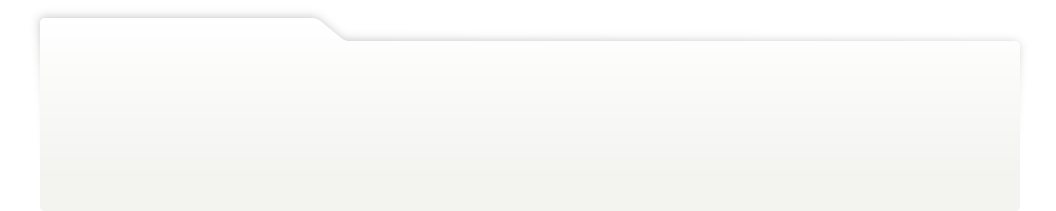
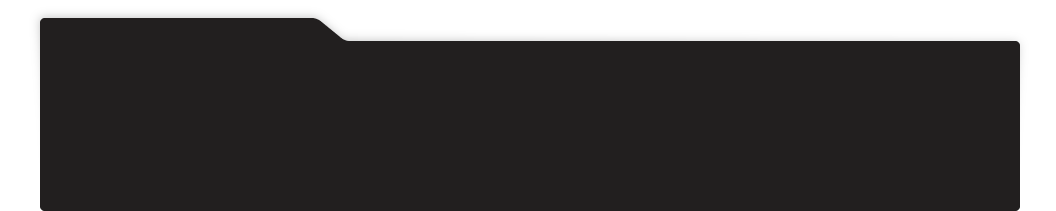
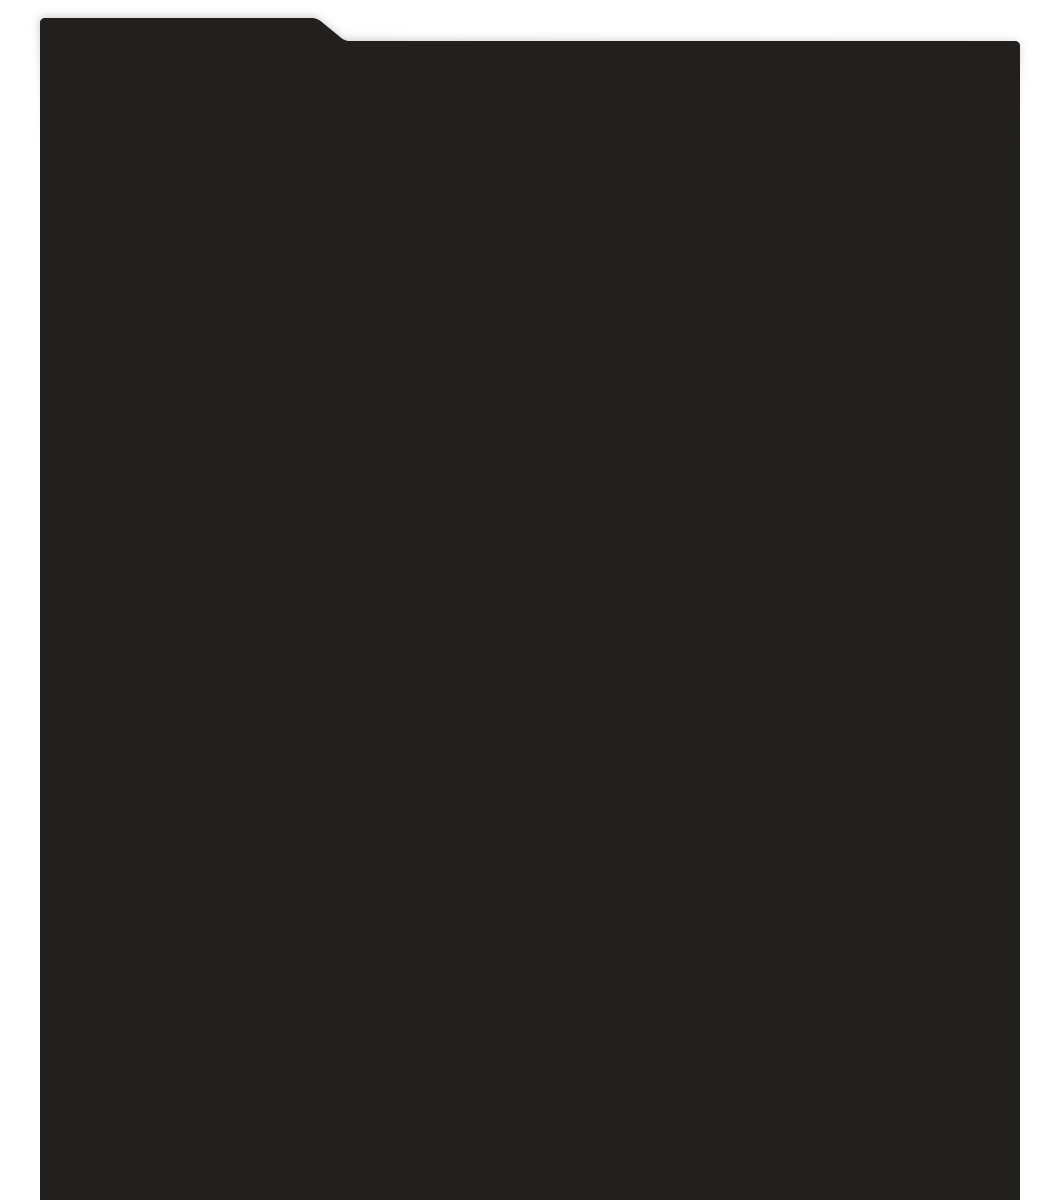
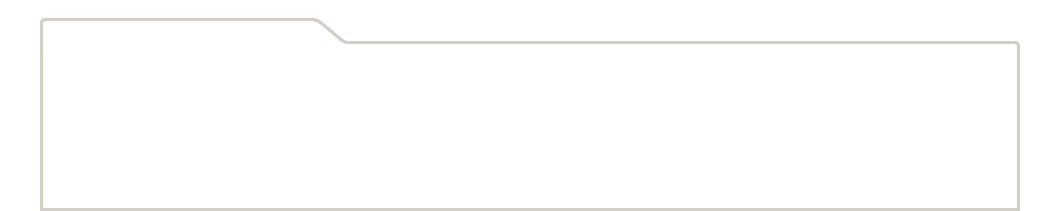
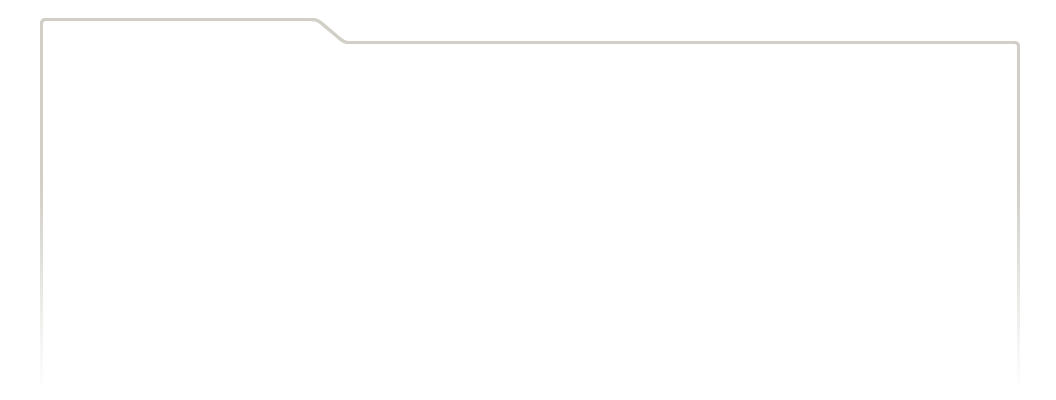
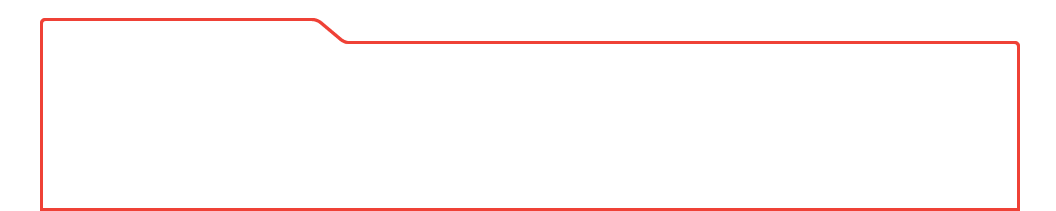
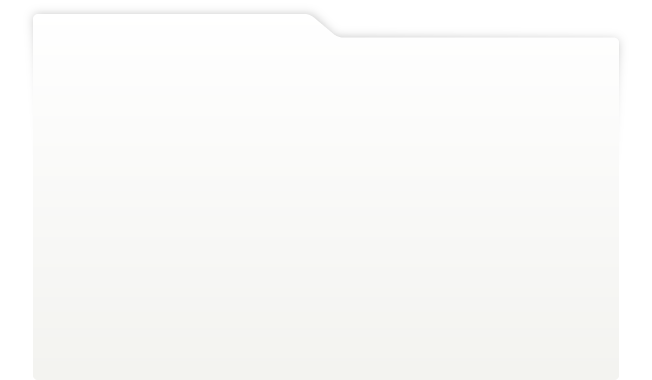
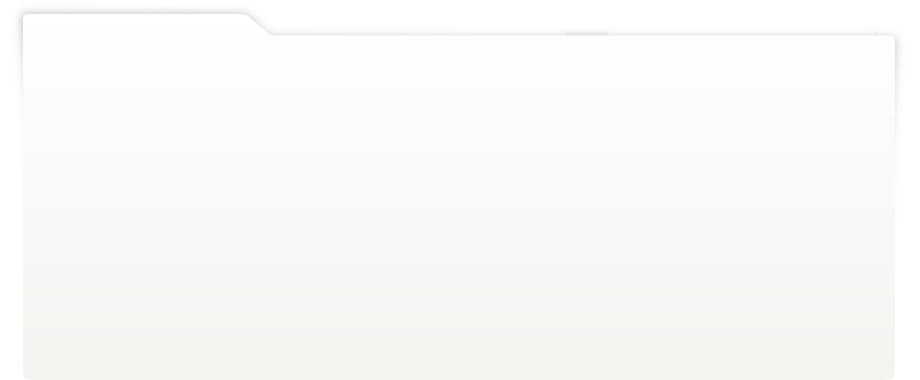
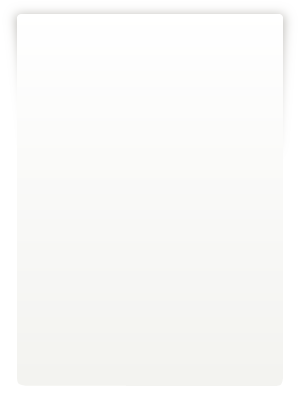
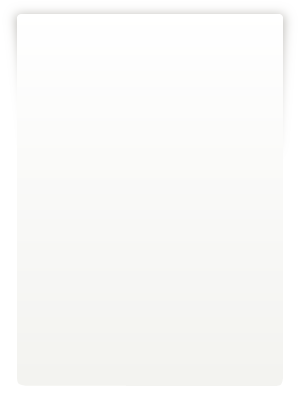
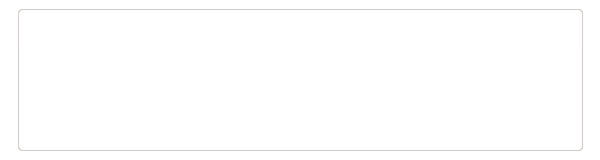
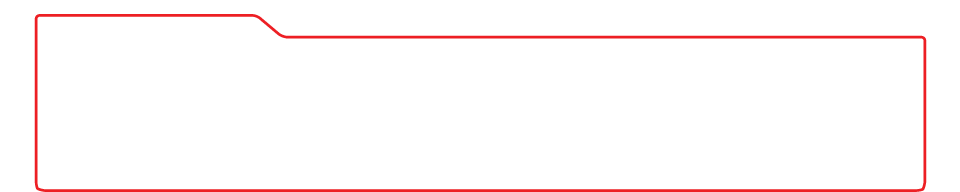
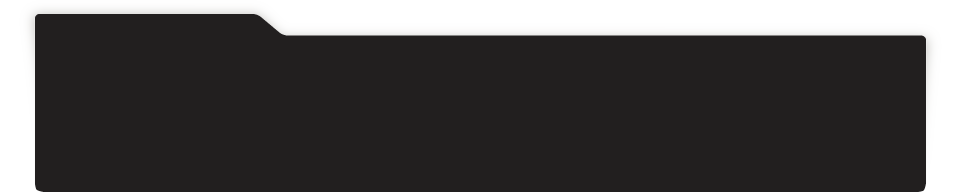
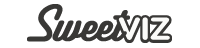
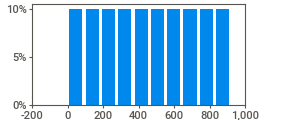
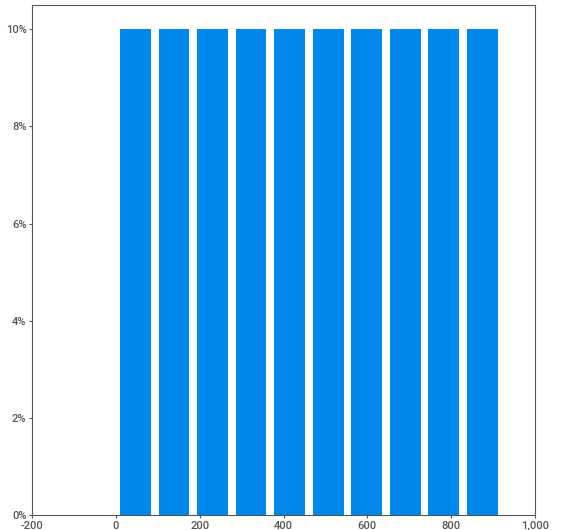
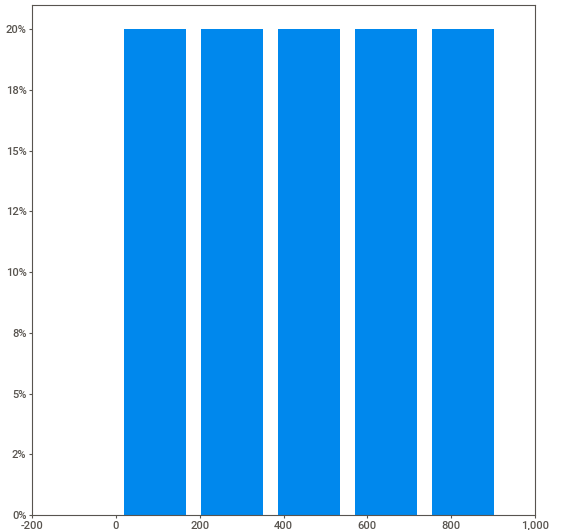
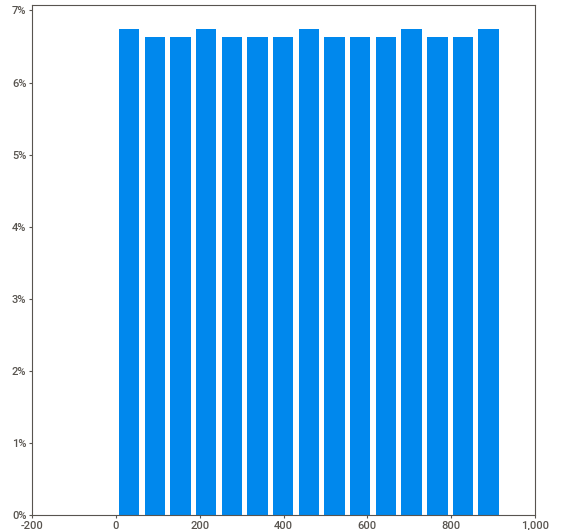
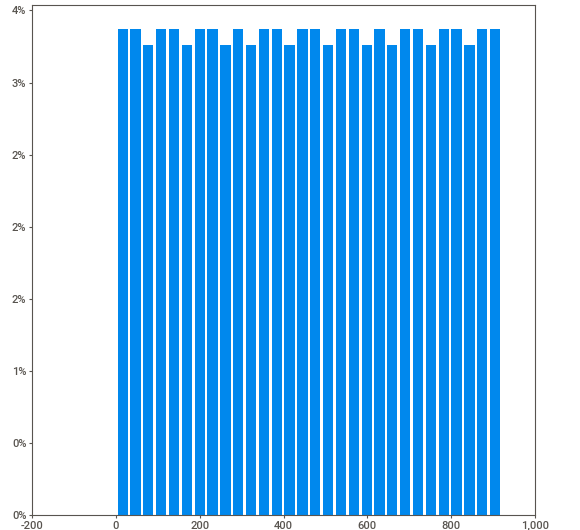
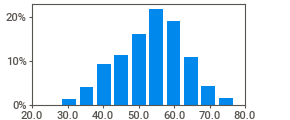
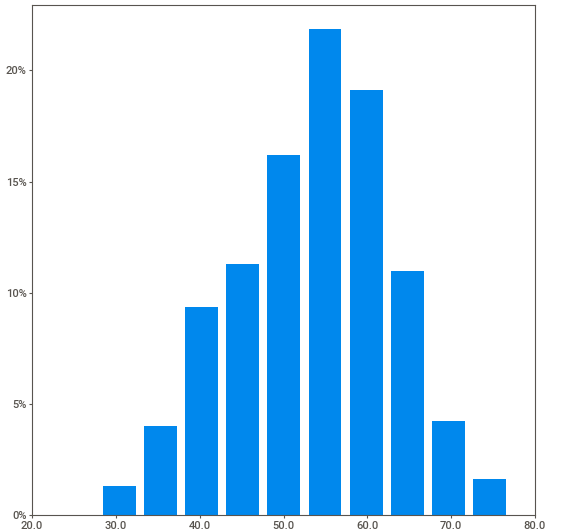
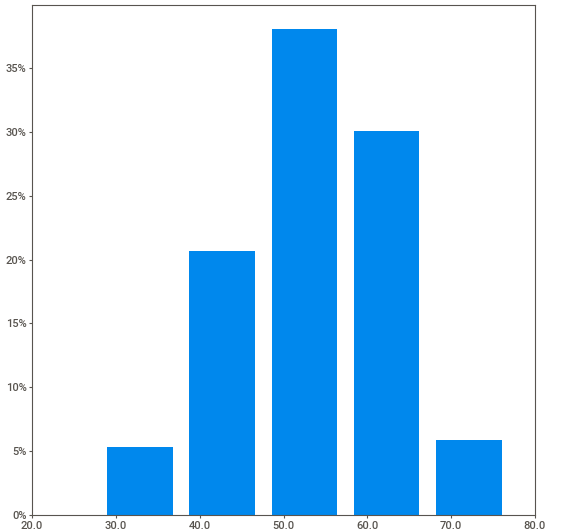
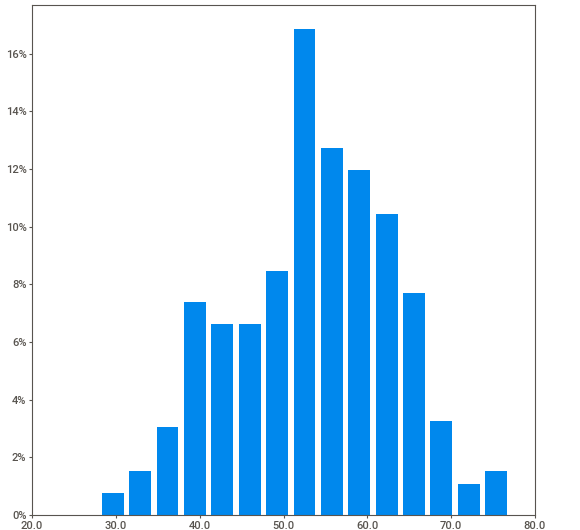
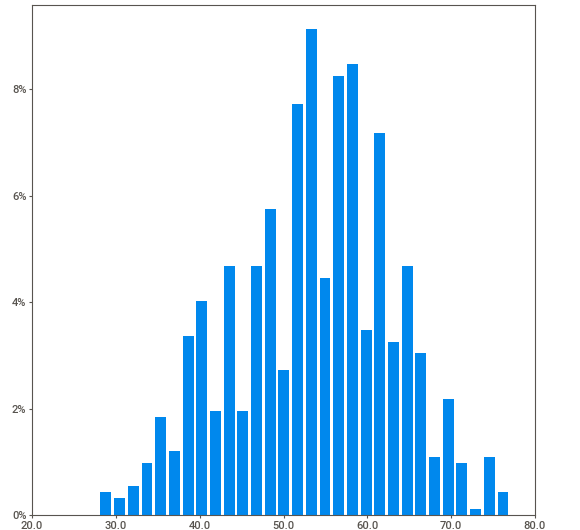
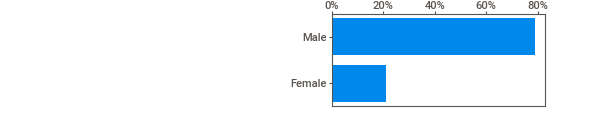
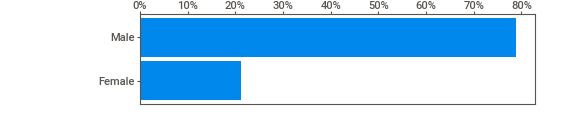
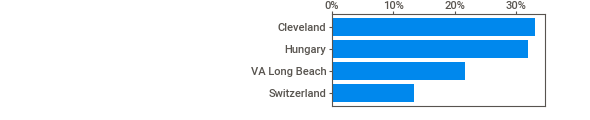
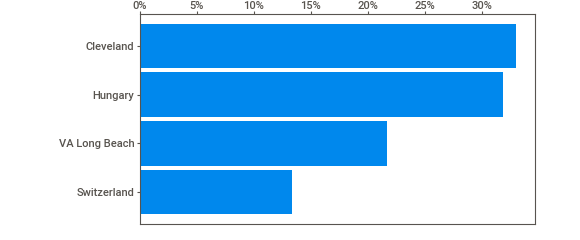
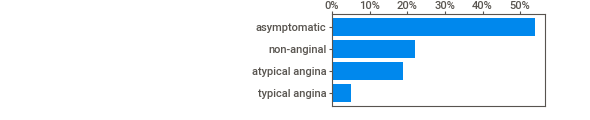
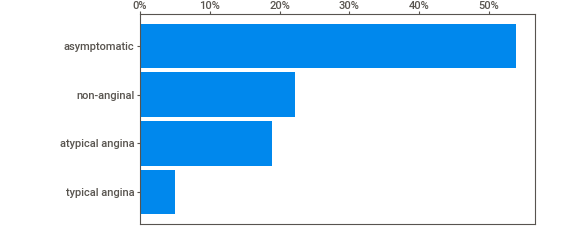
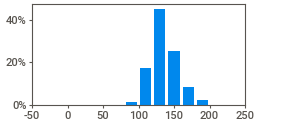
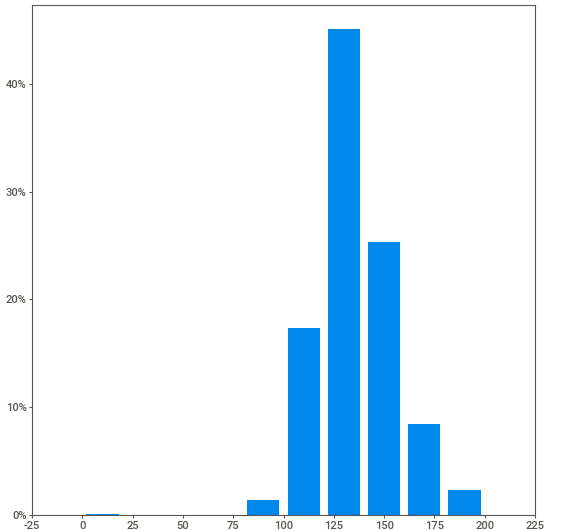
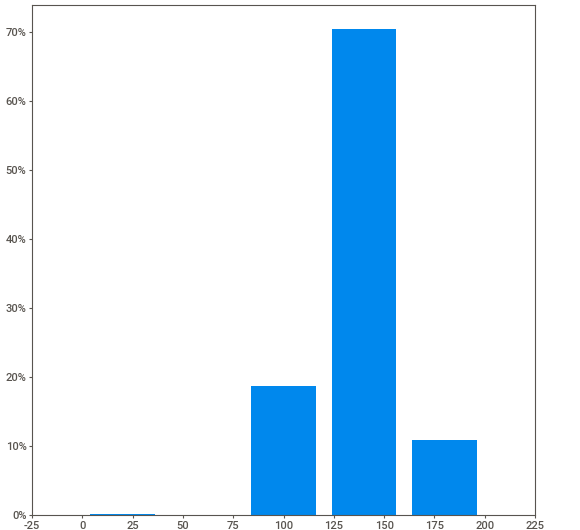
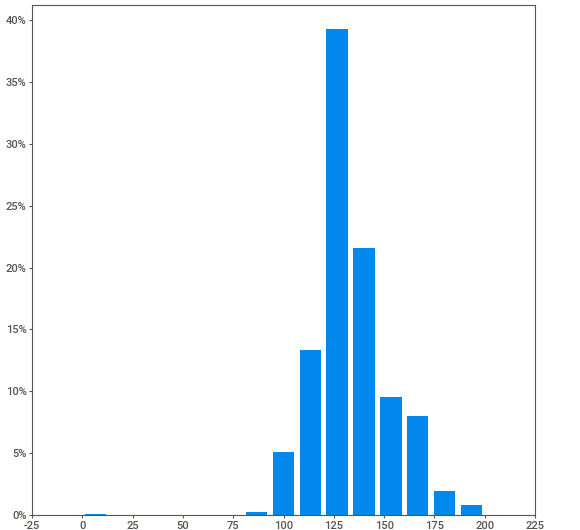
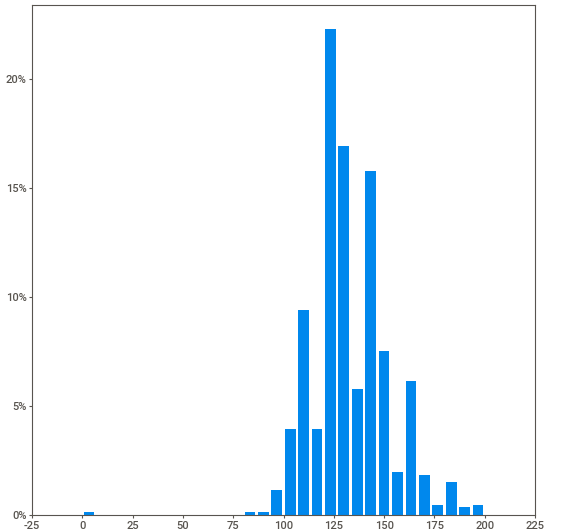
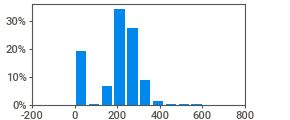
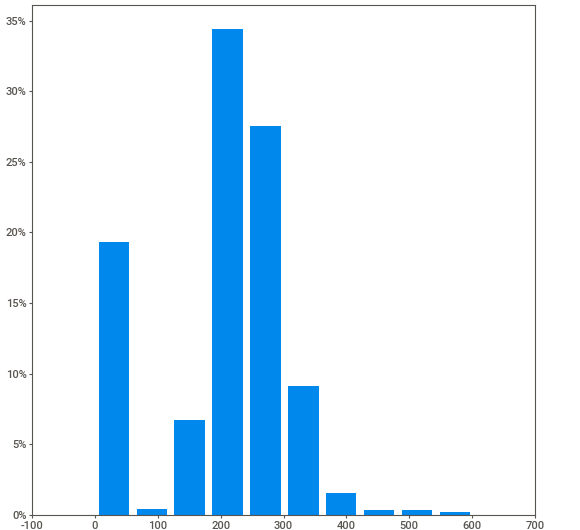
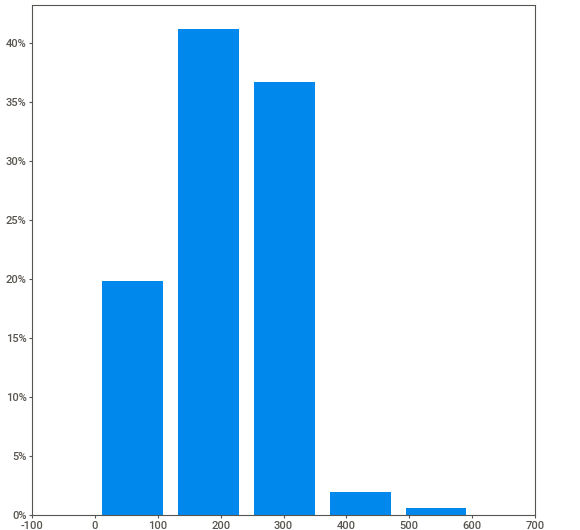
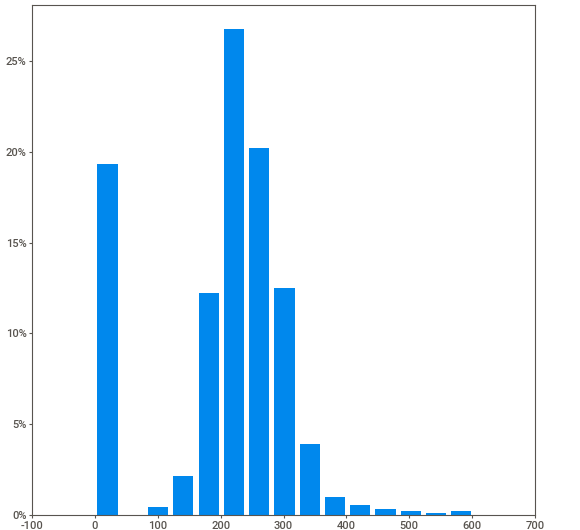
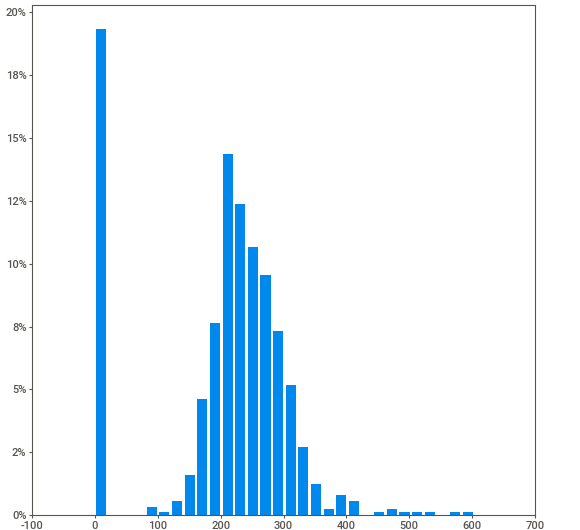
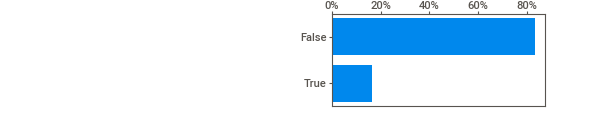
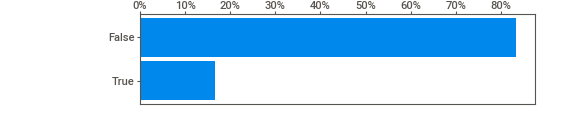
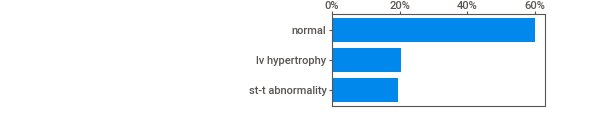
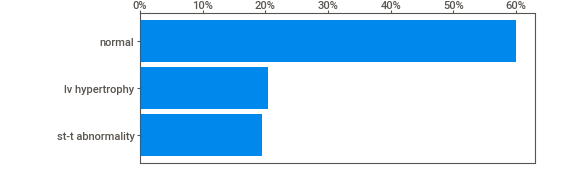
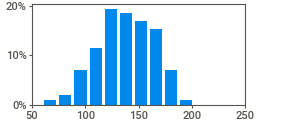
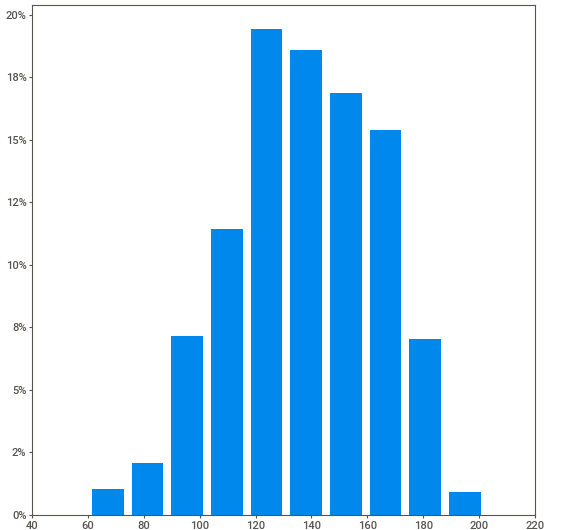
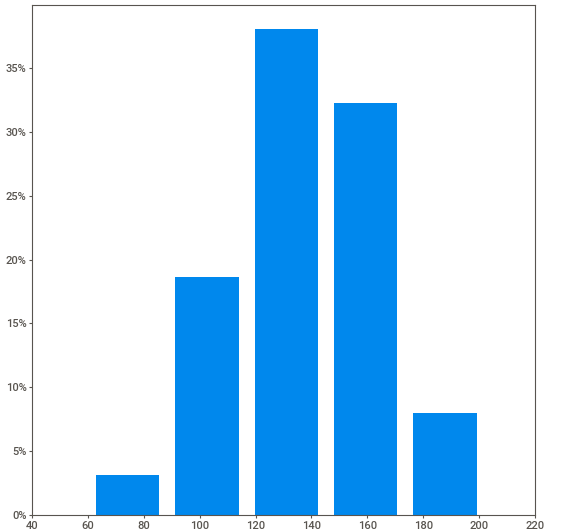
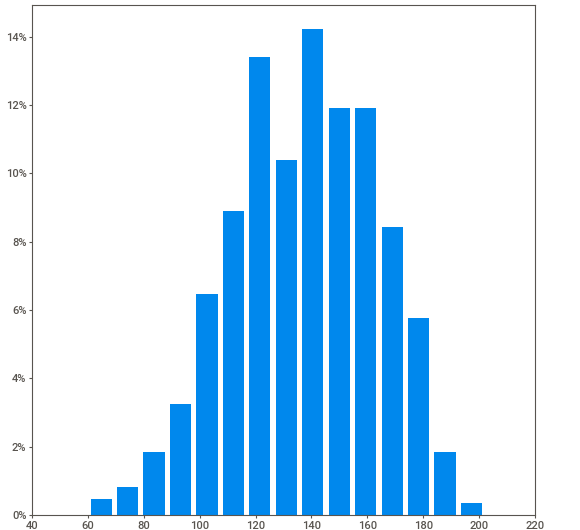
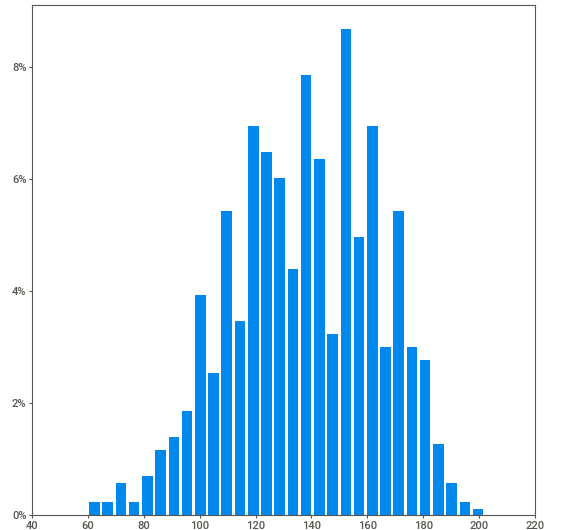
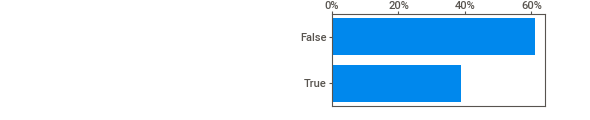
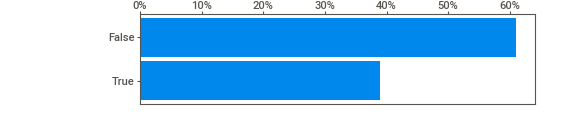
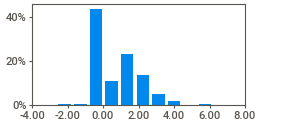
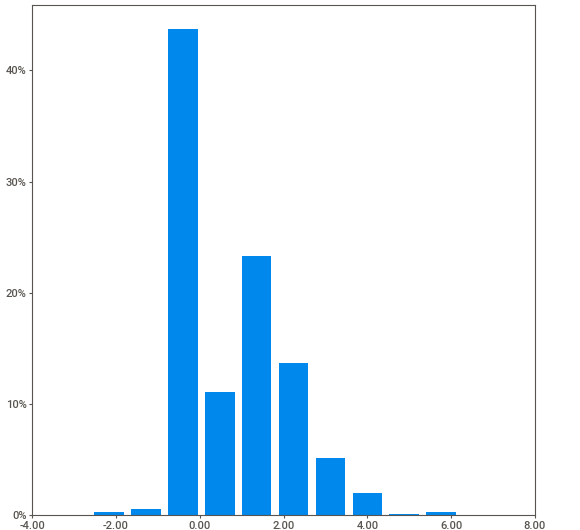
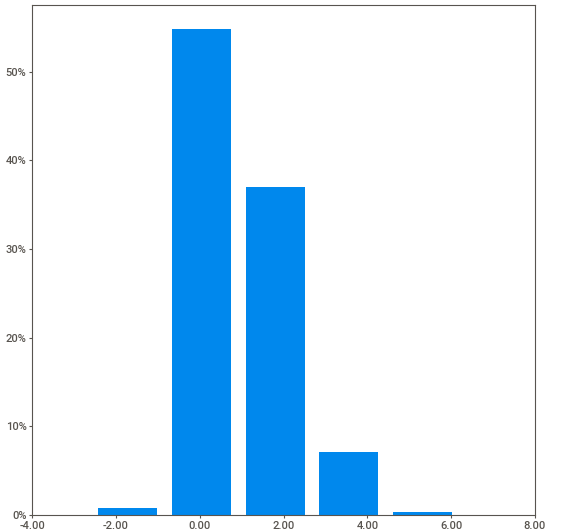
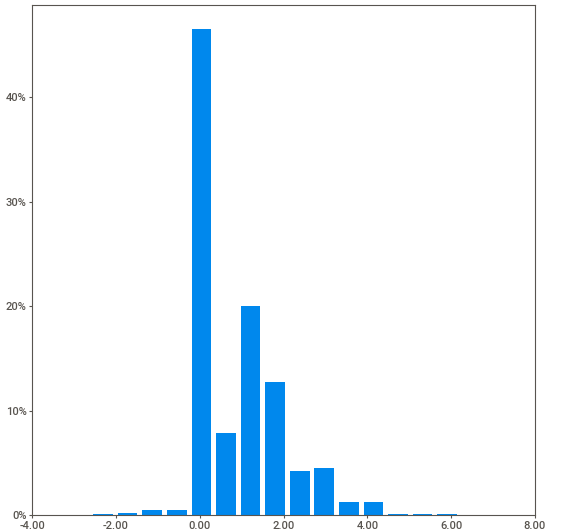
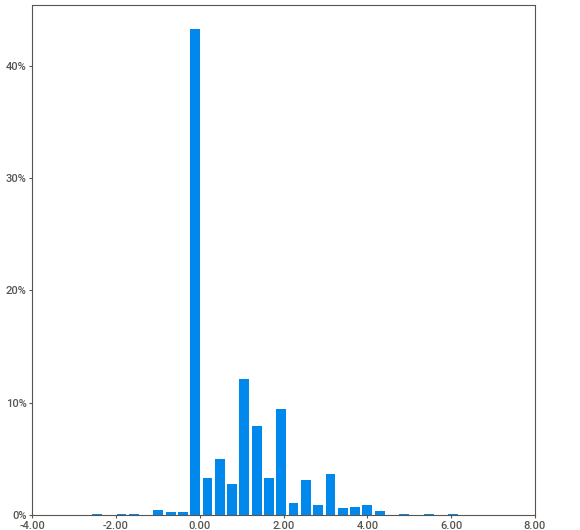
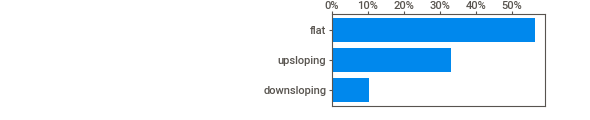
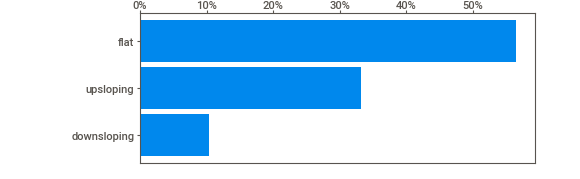
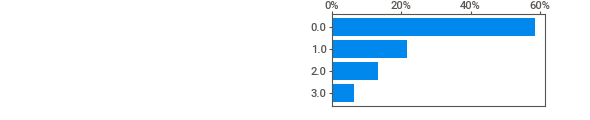
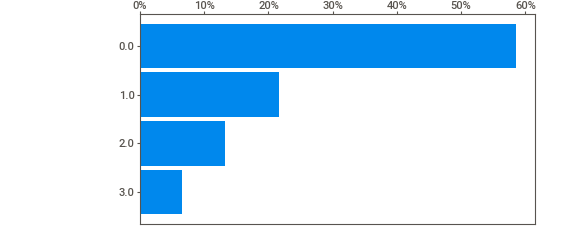
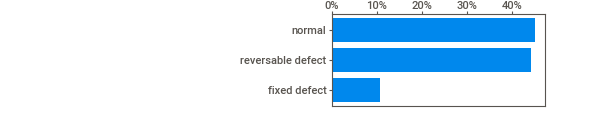
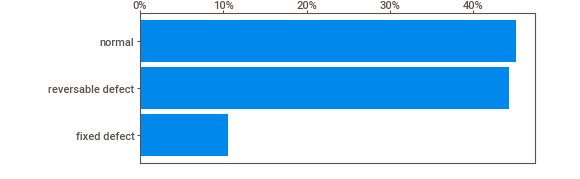
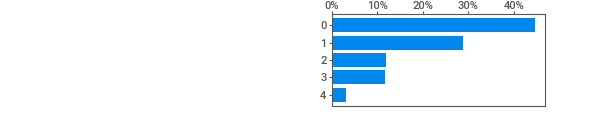
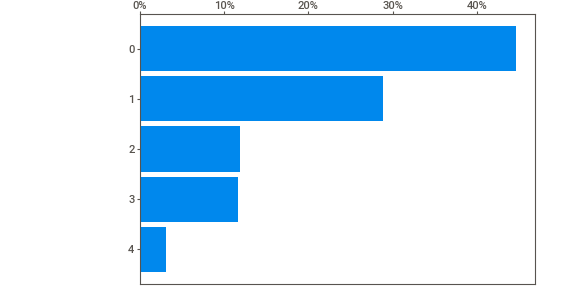
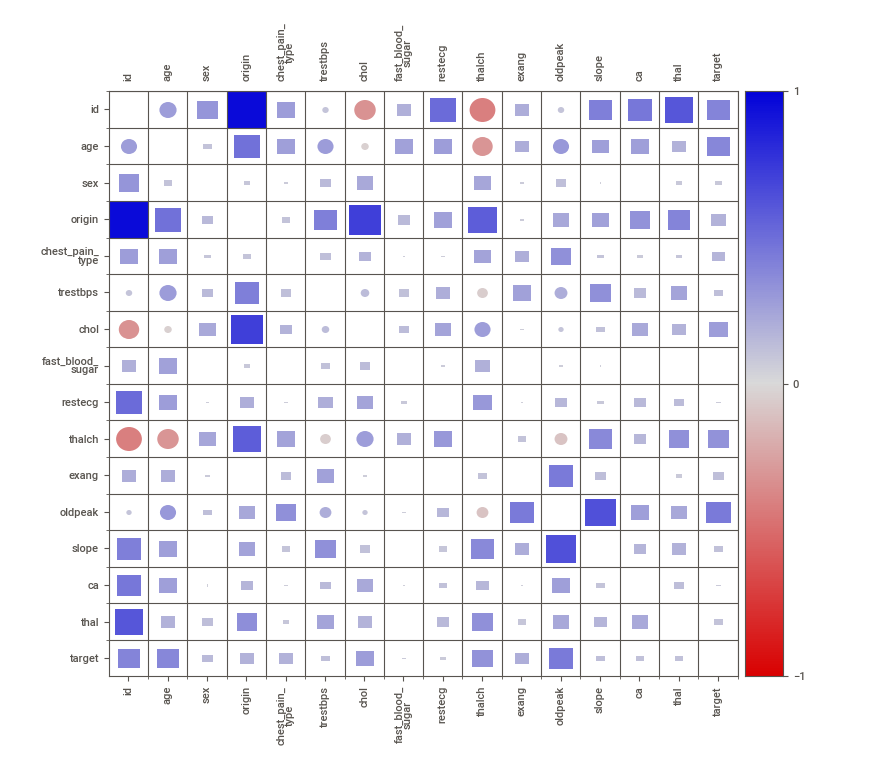
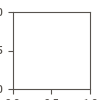

In [44]:
df_eda = sv.analyze(df)
df_eda.show_notebook()

**3.2 SUMMARY STATISTICS**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                920 non-null    int64  
 1   age               920 non-null    int64  
 2   sex               920 non-null    object 
 3   origin            920 non-null    object 
 4   chest_pain_type   920 non-null    object 
 5   trestbps          861 non-null    float64
 6   chol              890 non-null    float64
 7   fast_blood_sugar  830 non-null    object 
 8   restecg           918 non-null    object 
 9   thalch            865 non-null    float64
 10  exang             865 non-null    object 
 11  oldpeak           858 non-null    float64
 12  slope             611 non-null    object 
 13  ca                309 non-null    float64
 14  thal              434 non-null    object 
 15  target            920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory us

In [46]:
df.describe(include=['number'])

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**3.3 Checking the missing values**

In [47]:
# Removing un needed rows for specific for this task
# Drop the 'id' and 'origin' columns if they exist
if 'id' in df.columns:
    df = df.drop(columns=['id'])
if 'origin' in df.columns:
    df = df.drop(columns=['origin'])

df.dropna(inplace=True)


df.shape

(299, 14)

**3.4 Data types of each column**

In [48]:
# counting categorical and numerical columns
cat_cols = ['thal', 'ca', 'slope', 'restecg', 'chest_pain_type', 'sex', 'target']
bool_cols = ['fast_blood_sugar', 'exang']
num_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

print(f'Categorical_Columns : {cat_cols}')
print(f'Numeric_Columns     : {num_cols}')
print(f'Boolean_Columns     : {bool_cols}')

Categorical_Columns : ['thal', 'ca', 'slope', 'restecg', 'chest_pain_type', 'sex', 'target']
Numeric_Columns     : ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
Boolean_Columns     : ['fast_blood_sugar', 'exang']


### **3.5 Visualizations (Frequecy distribution, boxplots, correlation matrix)**

**3.5.1 correlation matrix**



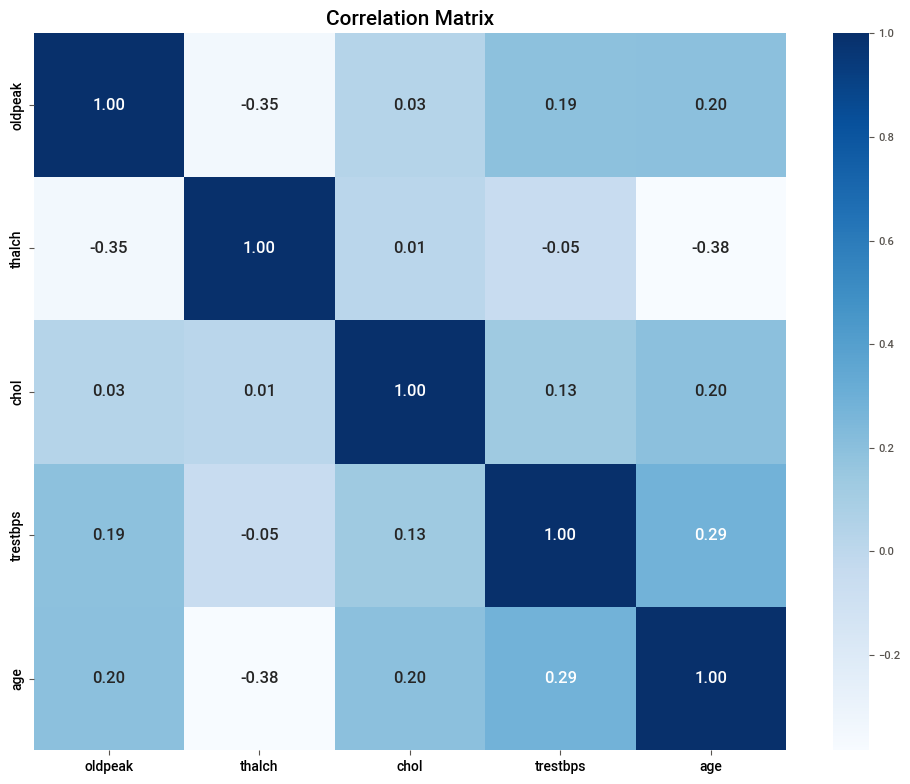

In [49]:
# Plot the heatmap with simplified code
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues', fmt='.2f')

# Customize ticks and title
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.title('Correlation Matrix', fontweight='bold', color='black', fontsize=15)
plt.tight_layout()

# Show the plot
plt.show()

**3.5.2 FREQUENCY DISTRIBUTION OF CATEGORICAL FEATURES**

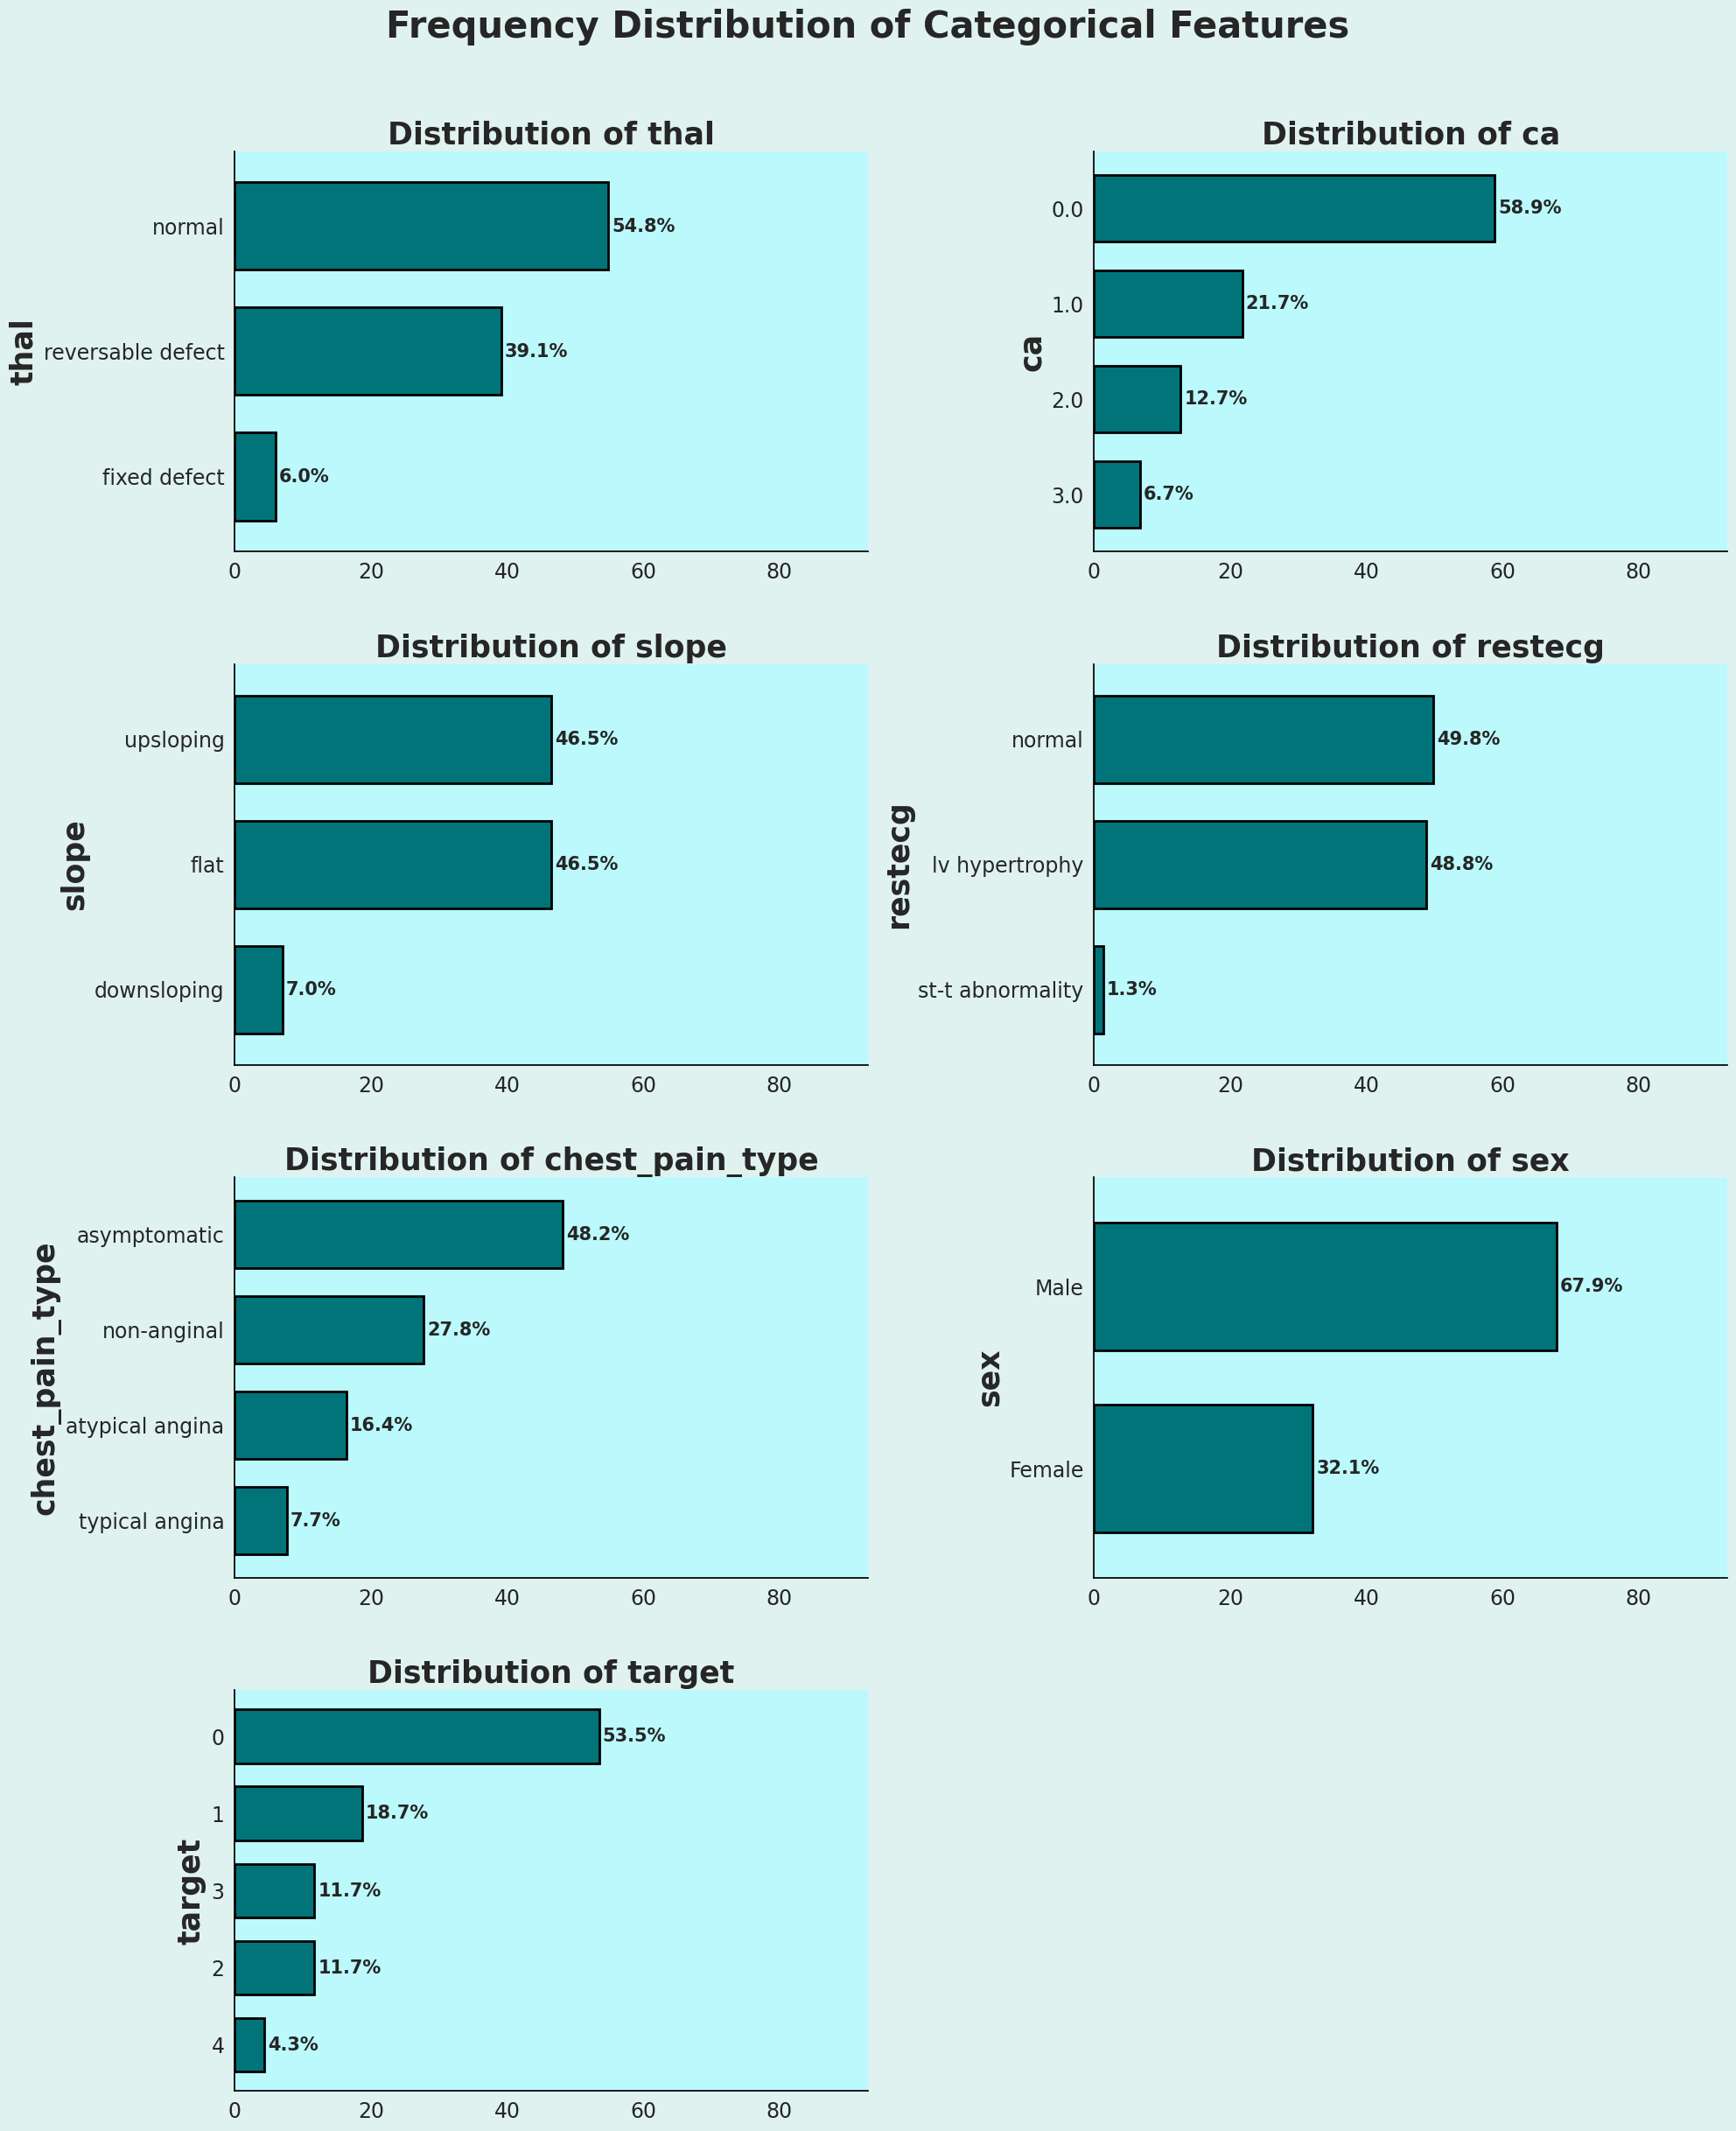

In [50]:

# Set theme
sns.set_theme(rc={'axes.facecolor':'#bbf9fc', 'figure.facecolor':'#dff2ef'})

# Create figure and axes
fig, axes = plt.subplots(6, 2, figsize=(20, 35))
axes = axes.flatten()

categorical_columns = ['thal', 'ca', 'slope', 'restecg', 'chest_pain_type', 'sex', 'target']

# Plot bar charts
for ax, col in zip(axes, categorical_columns):
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    value_counts.plot(kind='barh', width=0.7, color='#01747a', edgecolor='black', linewidth=2, ax=ax)

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax.text(value + 0.5, index, f'{value:.1f}%', fontsize=15, fontweight='bold', va='center')

    ax.set_title(f'\nDistribution of {col}', fontsize=25, fontweight='bold')
    ax.set_ylabel(col, fontsize=25, fontweight='bold')
    ax.set_xlim([0, 93])
    ax.grid(False)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='y', labelsize=17, labelrotation=0, width=2, length=5)
    ax.tick_params(axis='x', labelsize=17, width=2, length=5)

# Remove unused axes
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Frequency Distribution of Categorical Features', fontsize=30, fontweight='bold', y=1.02)
plt.show()


**3.5.3 PIE CHART OF STATES DATA**

In [51]:
import plotly.express as px

# Calculate gender count
gender_count = df['sex'].value_counts()

# Define colors
colors = ['#32a0a8', '#599173']

# Create pie chart using Plotly Express
fig = px.pie(
    names=gender_count.index,
    values=gender_count.values,
    color_discrete_sequence=colors,
    title='Distribution of Gender Among Samples'
)

# Update layout
fig.update_traces(textinfo='label+percent', marker=dict(line=dict(color='black', width=2)))
fig.update_layout(
    paper_bgcolor='#dff2ef',
    plot_bgcolor='#dff2ef',
    title_font_family="Times New Roman",
    title_font_color="#191e1f",
    title_font_size=30,
    font_family="Times New Roman",
    font_size=15,
    title_x=0.5,
    width=650,
    height=600
)

# Show figure
fig.show()


**3.5.4 Box plot of Numerical Columns**

In [52]:
# Create box plot
fig = px.box(
    df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']],
    color_discrete_sequence=['#057075'],
    title='Box plot of Numerical Columns'
)

# Update layout
fig.update_layout(
    paper_bgcolor='#dff2ef',
    plot_bgcolor='#dff2ef',
    title_x=0.5,
    title_font=dict(family="Times New Roman", color="#191e1f", size=30),
    font=dict(family="Calibri", size=15),
    width=600
)

# Update axes
fig.update_xaxes(title=None, tickfont=dict(family="Arial Black"), linecolor='black', showgrid=False)
fig.update_yaxes(title=None, tickfont=dict(family="Arial Black"), linecolor='black', showgrid=False)

# Show figure
fig.show()

**3.5.5 SCATTER PLOT OF AGE VS MAX HEART RATE**

**3.5.5.1 Printing unique values in the target variable and mean age of people grouped by target:** **bold text**

In [53]:
# Unique values in Target Variable
sort_unique_values = sorted(df['target'].unique())
print(f'Unique values in Target Variable are : {sort_unique_values}\n')

# Mean age grouped by target
grouped = df.groupby('target')['age'].mean().reset_index()
print(grouped)

# Mean age of people having any level of disease
print(f'\nMean age of people having any level of disease : {grouped.iloc[1:,1].mean()}')

# Mean of Max Heart Rate grouped by target
grouped1 = df.groupby('target')['thalch'].mean().reset_index()
print(grouped1)
print(f'\nMean of Max Heart Rate of people having any level of disease : {grouped1.iloc[1:,1].mean()}')


Unique values in Target Variable are : [0, 1, 2, 3, 4]

   target        age
0       0  52.643750
1       1  55.464286
2       2  58.200000
3       3  56.000000
4       4  59.692308

Mean age of people having any level of disease : 57.33914835164835
   target      thalch
0       0  158.581250
1       1  144.660714
2       2  135.000000
3       3  132.057143
4       4  140.615385

Mean of Max Heart Rate of people having any level of disease : 138.08331043956045


**3.5.5.2 Plotting scatter plot between age and thalch with annotations and styling:**

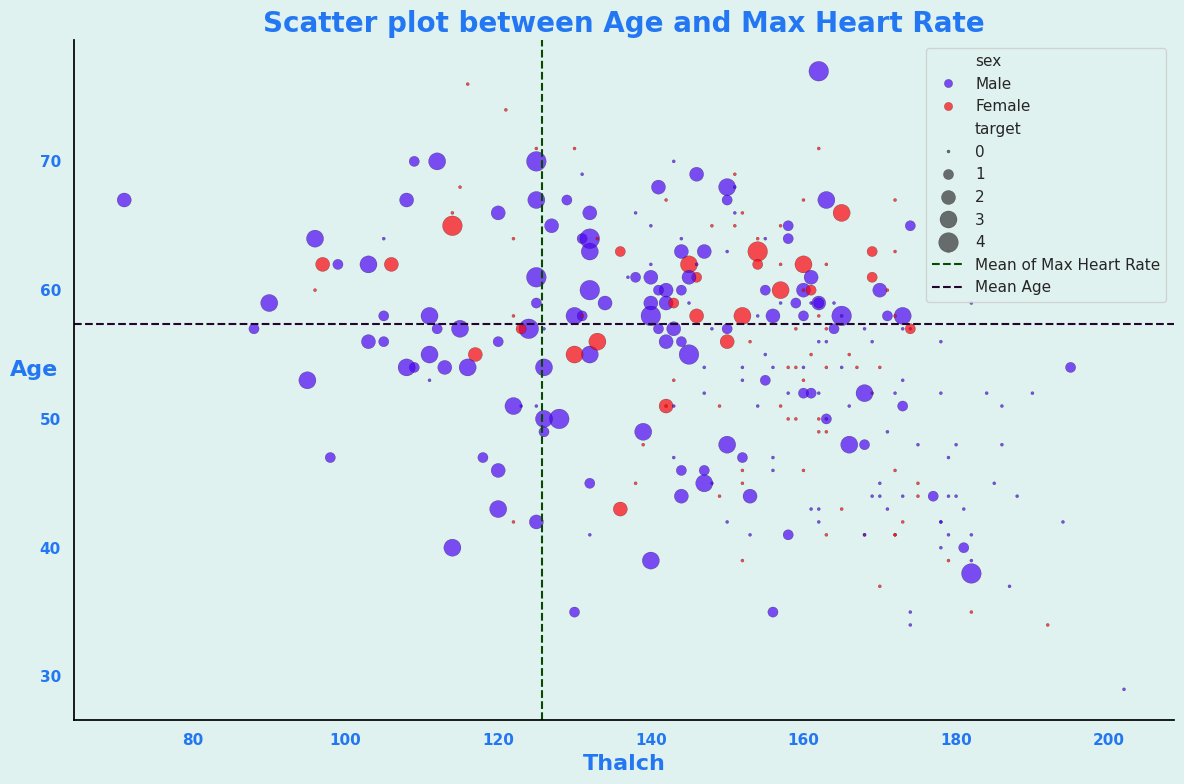

In [54]:
# Set theme
sns.set_theme(rc={'axes.facecolor':'#dff2ef','figure.facecolor':'#dff2ef'})

# Scatter plot
fig, ax = plt.subplots(figsize=(12,8))
colors_ = {'Male':'#4c05f2', 'Female':'#fc030b'}
sns.scatterplot(data=df, x='thalch', y='age', hue='sex', palette=colors_, size='target', edgecolors='black', alpha=0.7, sizes=(5, 200))

# Annotations
ax.axvline(125.73, linestyle='--', color='#074a00', label='Mean of Max Heart Rate')
ax.axhline(57.393, linestyle='--', color='#24052e', label='Mean Age')
ax.annotate(text="Mean Age : 53.50", xy=(54, 57.393), xytext=(58, 45), arrowprops={}, fontweight='bold', color='#24052e')
ax.annotate(text="Mean of Max heart rate : 57.393", xy=(125.737, 26), xytext=(60, 28), arrowprops={}, fontweight='bold', color='#074a00')

# Plot details
plt.title('Scatter plot between Age and Max Heart Rate', fontsize=20, fontweight='bold', color='#2477f2')
plt.xlabel('Thalch', fontsize=16, fontweight='bold', color='#2477f2')
plt.ylabel('Age', fontsize=16, fontweight='bold', color='#2477f2', rotation=360)
plt.xticks(color='#2477f2', weight='bold')
plt.yticks(color='#2477f2', weight='bold')
plt.tight_layout()

# Styling spines and legends
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc='upper right')
plt.grid(False)

# Show plot
plt.show()

**3. 6 BUTTERFLY CHART DISTRIBUTION OF GENDER WITH DISEASE LEVEL**

<ipython-input-55-5c6d163757bb>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



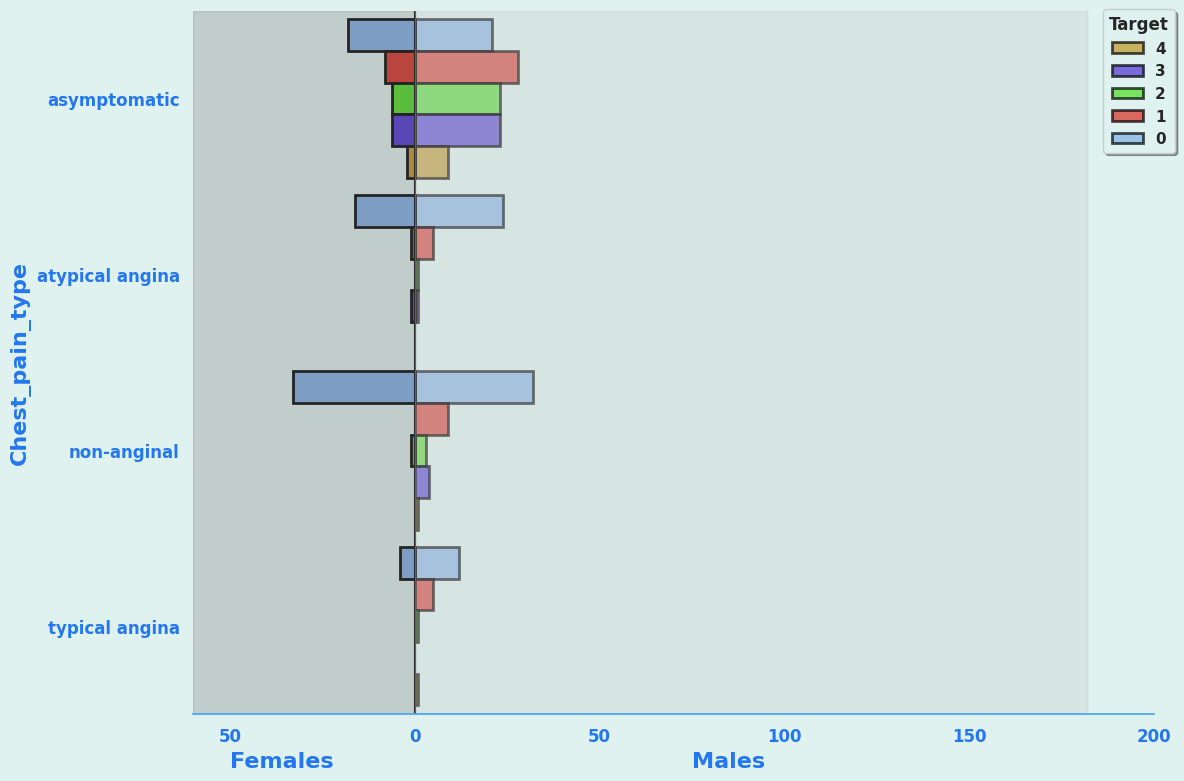

In [55]:
# Group data by target, chest_pain_type, and sex, and calculate counts
chest_pain_type = df.groupby(['target', 'chest_pain_type', 'sex']).size().reset_index(name='Total')

# Filter data for males and females
Males = chest_pain_type.loc[chest_pain_type['sex'] == 'Male']
Females = chest_pain_type.loc[chest_pain_type['sex'] == 'Female']
Females['Total'] = -Females['Total']  # Invert counts for females to plot them properly

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Palette for different chest pain types
palette = {0: '#6eadf5', 1: '#f51307', 2: '#39fc03', 3: '#3b18ed', 4: '#d6a30b'}

# Barplots for males and females
sns.barplot(data=Males, x='Total', y='chest_pain_type', hue='target', palette=palette,
            width=0.9, edgecolor='black', linewidth=2, alpha=0.7, ax=ax)
sns.barplot(data=Females, x='Total', y='chest_pain_type', hue='target', palette=palette,
            width=0.9, edgecolor='black', linewidth=2, ax=ax)

# Legend
handles, labels = ax.get_legend_handles_labels()
plot1 = ax.legend(handles[:5], labels[:5], title='Target', loc='center right', prop={'weight': 'bold'},
                  bbox_to_anchor=(1.03, 0.9), reverse=True, shadow=True)
plt.setp(plot1.get_title(), fontweight='bold')

# Vertical line at x=0
plt.axvline(0, linestyle='-', color='black', zorder=1)

# Text annotations for genders
plt.text(75, 3.8, 'Males', fontweight='bold', fontsize=16, color='#2477f2')
plt.text(-50, 3.8, 'Females', fontweight='bold', fontsize=16, color='#2477f2')

# Plot formatting
ax.set_xlabel('')
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#49a5f5')
plt.grid(False)
plt.xlim([-60, 200])
plt.xticks([-50, 0, 50, 100, 150, 200], [50, 0, 50, 100, 150, 200], color='#2477f2', weight='bold', fontsize=12)
plt.yticks(color='#2477f2', weight='bold', fontsize=12)
plt.ylabel('Chest_pain_type', fontsize=16, fontweight='bold', fontname='Calibri', color='#2477f2')

# Background spans
plt.axvspan(0, 182, color='#c4c4c4', alpha=0.3, zorder=1)
plt.axvspan(-60, 0, color='#7a7878', alpha=0.3, zorder=2)

plt.tight_layout()
plt.show()

## **4. Data Preprocessing**

### **4.1 PIPELINE PRE-PROCESSING**

In [56]:
# Define preprocessing pipeline
def preprocess_data(df):
    # Encoding categorical variables
    cat_cols = ['thal', 'ca', 'slope', 'restecg', 'chest_pain_type', 'sex']
    bool_cols = ['fast_blood_sugar', 'exang']
    num_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

    # Handling missing values
    df.dropna(inplace=True)

    # Scaling numerical features using RobustScaler
    scaler = RobustScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    # Encoding categorical features
    encoder = OrdinalEncoder()
    df[cat_cols] = encoder.fit_transform(df[cat_cols])

    return df

df_processed = preprocess_data(df)

**4.2 SPLITTING THE DATA**

In [57]:
# Split data into features and target
X = df_processed.drop(columns=['target'])
y = df_processed['target']

**Apply K-means clustering**

In [58]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Apply hierarchical clustering**

In [59]:
# Apply hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

**Apply DBSCAN clustering**

In [60]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

**Apply PCA for visualization**

In [61]:
# Apply PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)


**Apply t-SNE for visualization**

In [62]:
# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X)

**Visualize the clusters**

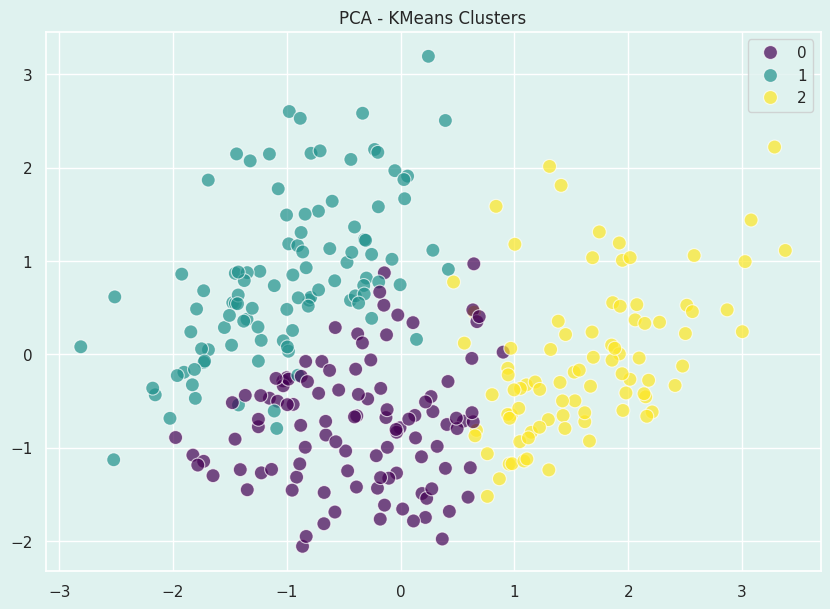

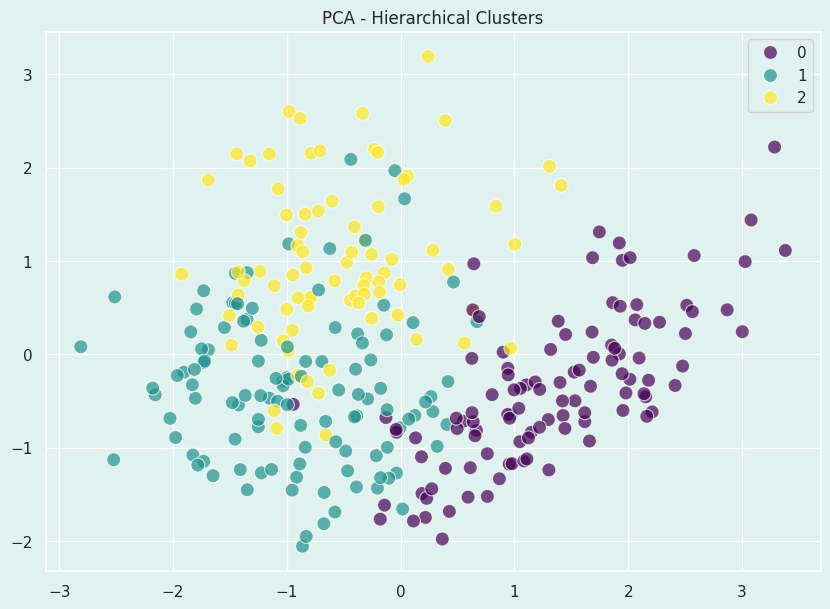

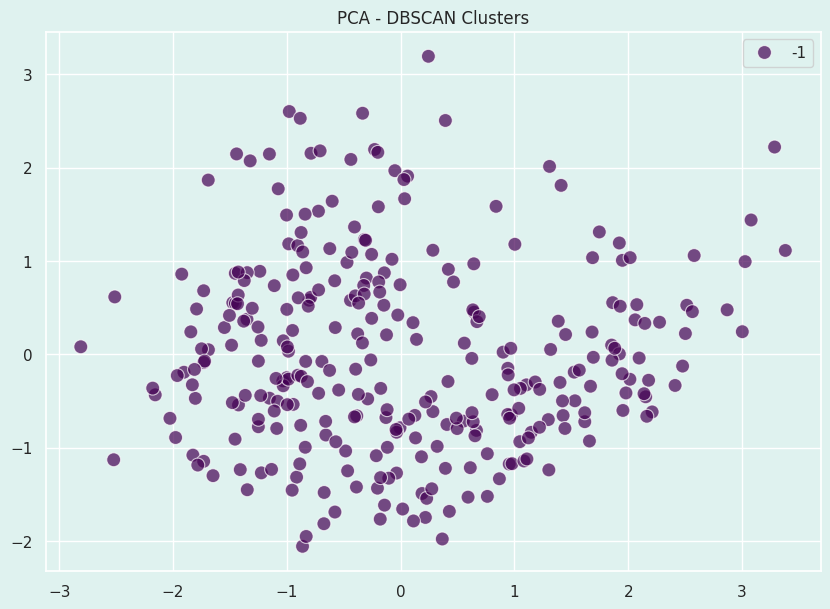

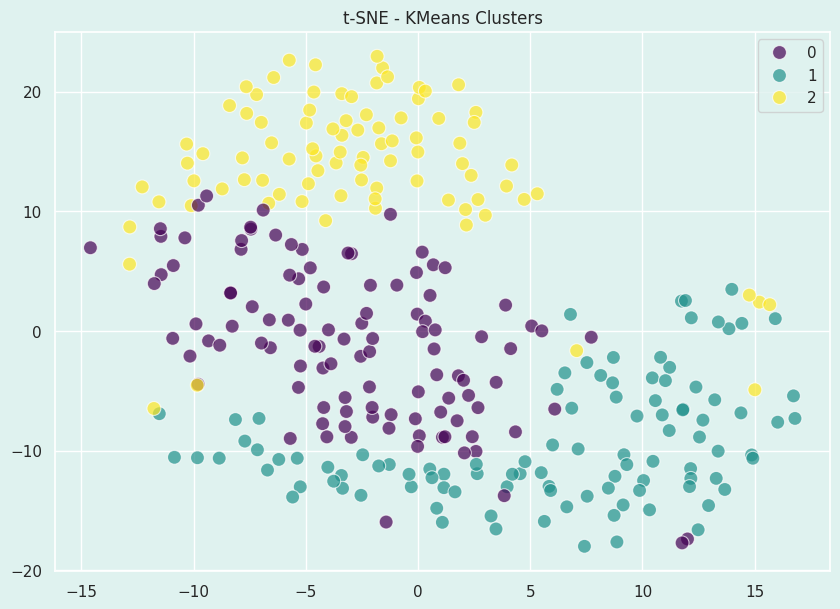

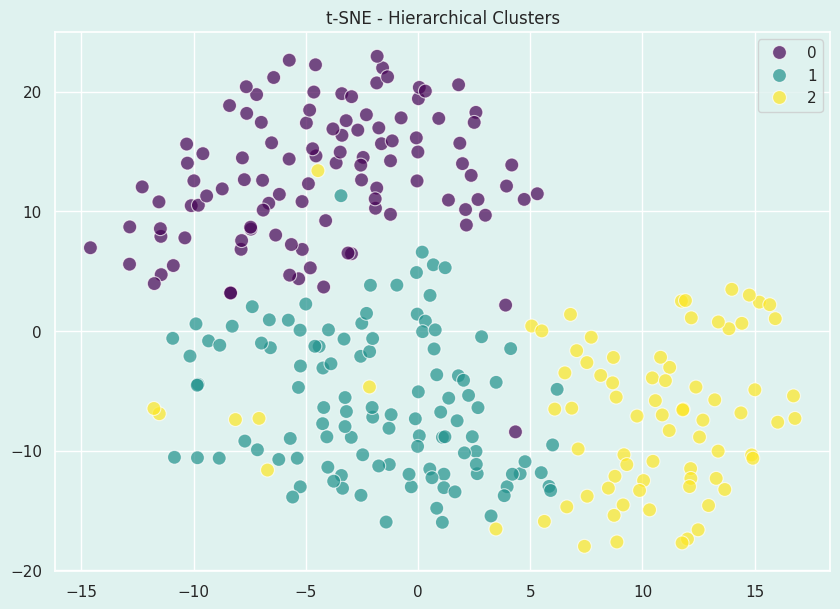

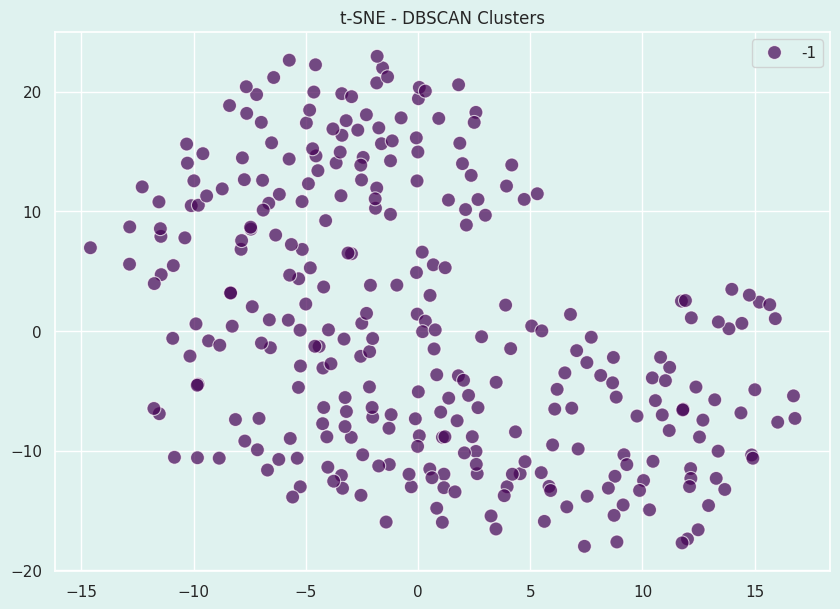

In [63]:
# Visualize the clusters
def plot_clusters(components, labels, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7)
    plt.title(title)
    plt.show()

plot_clusters(pca_components, kmeans_labels, 'PCA - KMeans Clusters')
plot_clusters(pca_components, hierarchical_labels, 'PCA - Hierarchical Clusters')
plot_clusters(pca_components, dbscan_labels, 'PCA - DBSCAN Clusters')

plot_clusters(tsne_components, kmeans_labels, 't-SNE - KMeans Clusters')
plot_clusters(tsne_components, hierarchical_labels, 't-SNE - Hierarchical Clusters')
plot_clusters(tsne_components, dbscan_labels, 't-SNE - DBSCAN Clusters')

**Reduce dimensionality with PCA before applying GMM**

In [64]:
# Reduce dimensionality with PCA before applying GMM
pca_full = PCA(n_components=10, random_state=42)
X_pca_full = pca_full.fit_transform(X)

**Apply Gaussian Mixture Model**

In [67]:
# Apply Gaussian Mixture Model with 'tied' covariance type
gmm = GaussianMixture(n_components=3, random_state=42, covariance_type='tied', init_params='kmeans')
gmm_labels = gmm.fit_predict(X_pca_full)

**Evaluate clustering performance**

In [68]:
# Evaluate clustering performance
def evaluate_clustering(labels, X):
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin_avg = davies_bouldin_score(X, labels)
    return silhouette_avg, davies_bouldin_avg

kmeans_silhouette, kmeans_db = evaluate_clustering(kmeans_labels, X)
hierarchical_silhouette, hierarchical_db = evaluate_clustering(hierarchical_labels, X)
gmm_silhouette, gmm_db = evaluate_clustering(gmm_labels, X_pca_full)

**Print clustering performance**

In [69]:
# Print clustering performance
print(f"KMeans - Silhouette Score: {kmeans_silhouette}, Davies-Bouldin Index: {kmeans_db}")
print(f"Hierarchical - Silhouette Score: {hierarchical_silhouette}, Davies-Bouldin Index: {hierarchical_db}")
print(f"GMM - Silhouette Score: {gmm_silhouette}, Davies-Bouldin Index: {gmm_db}")

KMeans - Silhouette Score: 0.13606763631327498, Davies-Bouldin Index: 2.0349885388846536
Hierarchical - Silhouette Score: 0.12493955926588017, Davies-Bouldin Index: 2.2126067921438506
GMM - Silhouette Score: 0.15493761888000282, Davies-Bouldin Index: 1.9794740155624397


**Compare the performance and choose the best one**

In [70]:
# Compare the performance and choose the best one
best_algorithm = min([(kmeans_silhouette, kmeans_db, 'KMeans'),
                      (hierarchical_silhouette, hierarchical_db, 'Hierarchical'),
                      (gmm_silhouette, gmm_db, 'GMM')],
                     key=lambda x: (x[0], -x[1]))

print(f"Best Algorithm: {best_algorithm[2]} with Silhouette Score: {best_algorithm[0]} and Davies-Bouldin Index: {best_algorithm[1]}")

Best Algorithm: Hierarchical with Silhouette Score: 0.12493955926588017 and Davies-Bouldin Index: 2.2126067921438506
